# Pre Date

In [2]:
import numpy as np 
import pandas as pd

df_ba = pd.read_csv("ceramics-ba.csv")
temp_ba = df_ba["t"].values
cap_ba = df_ba["F"].values
radias_ba = 9.11e-3
thick_ba = 2.253e-3
area_ba = (radias_ba/2)**2 * np.pi
df_ba["er"] = (cap_ba*1e-12*thick_ba)/(8.854e-12*area_ba)
df_ba["1/er"] = 1/df_ba['er'].values
idxmax_ba = df_ba.idxmax()["F"]
erinv_ba = df_ba.iloc[idxmax_ba:-1]['1/er'].values

df_sr = pd.read_csv("ceramics-sr.csv")
temp_sr = df_sr["t"].values
cap_sr = df_sr["F"].values
radias_sr = 8.61e-3
thick_sr = 1.78e-3
area_sr = (radias_sr/2)**2 * np.pi
df_sr["er"] = (cap_sr*1e-12*thick_sr)/(8.854e-12*area_sr)
df_sr["1/er"] = 1/df_sr['er'].values
idxmax_sr = df_sr.idxmax()["F"]
erinv_sr = df_sr.iloc[idxmax_sr:-1]['1/er'].values

# compute and visualization

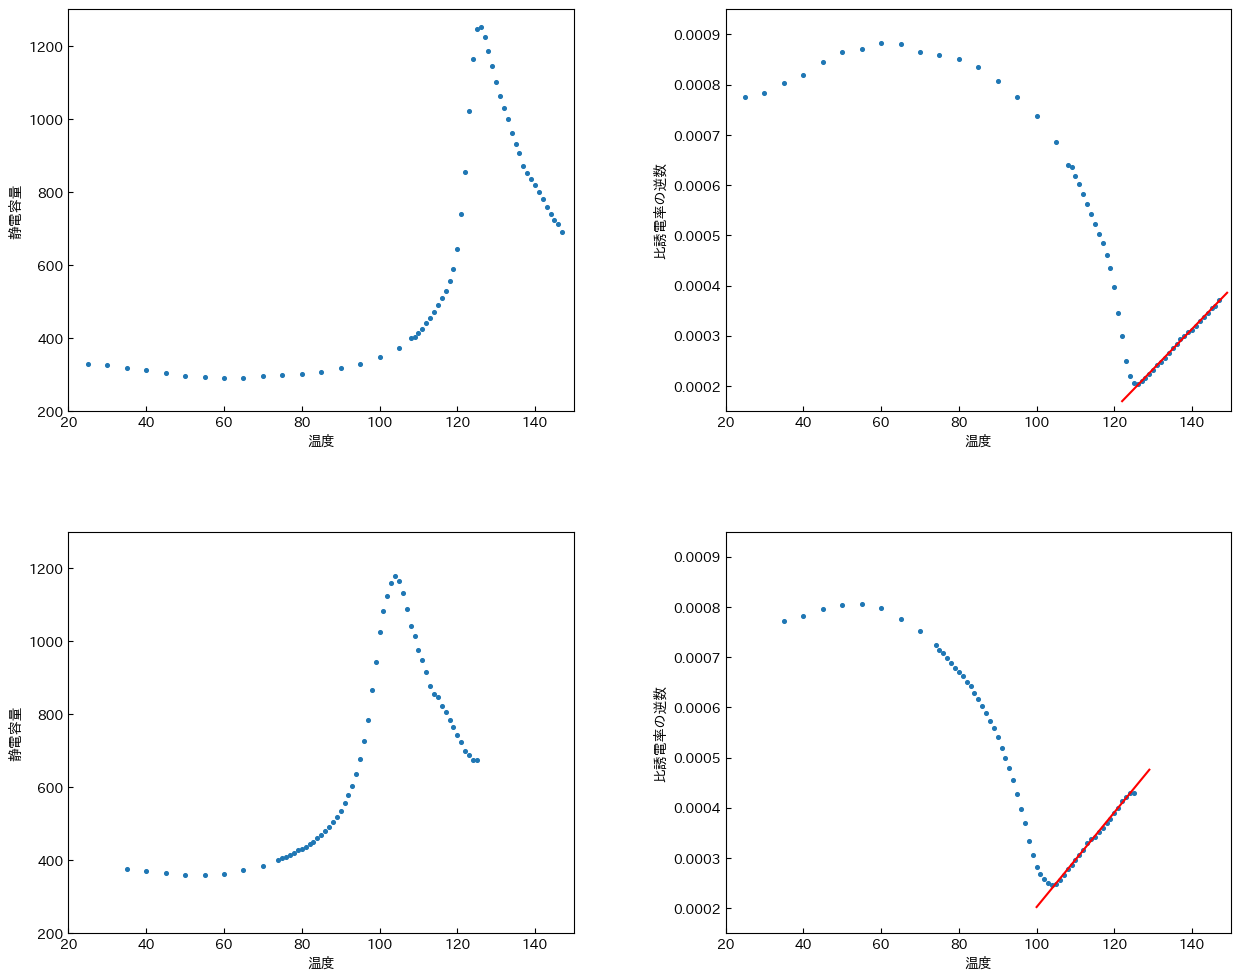

In [3]:
import matplotlib.pyplot as plt 
import japanize_matplotlib
from sklearn import linear_model

model_ba = linear_model.LinearRegression()
model_ba.fit(temp_ba[idxmax_ba:-1].reshape(-1,1), erinv_ba.reshape(-1,1))
pred_temp_ba = np.arange(122,150)
# pred_ba = model_ba.predict(temp_ba[idxmax_ba:-1].reshape(-1,1))
pred_ba = model_ba.predict(pred_temp_ba.reshape(-1,1))

model_sr = linear_model.LinearRegression()
model_sr.fit(temp_sr[idxmax_sr:-1].reshape(-1,1), erinv_sr.reshape(-1,1))
pred_temp_sr = np.arange(100,130)
# pred_sr = model_sr.predict(temp_sr[idxmax_sr:-1].reshape(-1,1))
pred_sr = model_sr.predict(pred_temp_sr.reshape(-1,1))

fig, ax = plt.subplots(2,2, figsize=(15,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(direction="in")
        ax[i,j].set_xlim(20,150)
        ax[i,j].set_xlabel("温度")
        if j==0:
            ax[i,j].set_ylim(200,1300)
            ax[i,j].set_ylabel("静電容量")
        else:
            ax[i,j].set_ylim(1.5e-4,9.5e-4)
            ax[i,j].set_ylabel("比誘電率の逆数")

ax[0,0].scatter(temp_ba, cap_ba, s=7)
ax[1,0].scatter(temp_sr, cap_sr, s=7)
ax[0,1].scatter(df_ba["t"].values, df_ba['1/er'].values, s=7)
# ax[0,1].plot(temp_ba[35:-1], pred_ba, color="red")
ax[0,1].plot(pred_temp_ba, pred_ba, color="red")
ax[1,1].scatter(df_sr["t"].values, df_sr['1/er'].values, s=7)
# ax[1,1].plot(temp_sr[38:-1], pred_sr, color="red")
ax[1,1].plot(pred_temp_sr, pred_sr, color="red")

plt.savefig("ceramics.pdf")

# result

In [4]:
print("純粋チタン酸バリウムのCurie温度:", df_ba.iloc[idxmax_ba]["t"])
print("純粋チタン酸バリウムのCurie定数:", model_ba.coef_, "\n")

print("ストロンチウム添加チタン酸バリウムのCurie温度:", df_sr.iloc[idxmax_sr]["t"])
print("ストロンチウム添加チタン酸バリウムのCurie定数:", model_sr.coef_)

df_ba["Curie定数から予測される比誘電率"] = 1/np.ravel(model_ba.coef_) / (df_ba['t']-df_ba.iloc[idxmax_ba]["t"])
# df_ba["キュリー定数"] = np.ravel(model_ba.coef_) * (df_ba['t']-df_ba.iloc[idxmax_ba]["t"])
print("\n")
df_ba

純粋チタン酸バリウムのCurie温度: 126.0
純粋チタン酸バリウムのCurie定数: [[7.99598931e-06]] 

ストロンチウム添加チタン酸バリウムのCurie温度: 104.0
ストロンチウム添加チタン酸バリウムのCurie定数: [[9.43003361e-06]]




,t,F,er,1/er,Curie定数から予測される比誘電率
0,25,330,1288.276185,0.000776,-1.238245e+03
1,30,327,1276.564584,0.000783,-1.302736e+03
2,35,319,1245.333646,0.000803,-1.374315e+03
3,40,313,1221.910442,0.000818,-1.454217e+03
4,45,303,1182.871770,0.000845,-1.543984e+03
5,50,296,1155.544700,0.000865,-1.645562e+03
6,55,294,1147.736965,0.000871,-1.761446e+03
7,60,290,1132.121496,0.000883,-1.894889e+03
8,65,291,1136.025363,0.000880,-2.050208e+03
9,70,296,1155.544700,0.000865,-2.233262e+03


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import IPython.display as display
from IPython.display import HTML


fig, ax = plt.subplots()
ax.set_xlim(0,10)
ax.set_ylim(-1,1)
frames = []
Y = []
T = []



for i in range(1000):
    y = np.sin(np.pi*t)
    t += 0.01
    T.append(t)
    Y.append(y)
    frame = ax.scatter(np.array(T),np.array(Y), s=10, color="red")
    frames.append([frame])

ani = ArtistAnimation(fig, frames, interval=50)
html = HTML(ani.to_jshtml())
display.display(html)
plt.close()